# Analysis of biospecimens from the Parkinson's Progression Markers Initiative (PPMI)


## http://www.ppmi-info.org/

In [2]:
from IPython.display import HTML
HTML("""<iframe width="854" height="480" src="https://www.youtube.com/embed/TkyLnWm1iCs?start=8" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>""")

In [3]:
# As always
import pandas as pd

In [4]:
# Load the data
df = pd.read_csv('data/Biospecimen_Analysis_Results.csv')
df.head()

,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
0,10874,Female,Prodromal,V02,Cerebrospinal Fluid,CSF Alpha-synuclein,2459.3,pg/ml,2016-11-09,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
1,10874,Female,Prodromal,BL,Cerebrospinal Fluid,CSF Alpha-synuclein,1778.3,pg/ml,2016-11-09,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
2,10874,Female,Prodromal,V04,Cerebrospinal Fluid,CSF Alpha-synuclein,1729.8,pg/ml,2016-11-09,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
3,10874,Female,Prodromal,V02,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2016-11-08,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0
4,10874,Female,Prodromal,BL,Cerebrospinal Fluid,CSF Hemoglobin,148.0,ng/ml,2016-11-08,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0


### Let's rename a few things to make it easier to read

In [5]:
df = df.rename(columns={'PATNO':'PATIENT'}).replace('BL','Baseline')
df.head()

,PATIENT,GENDER,DIAGNOSIS,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
0,10874,Female,Prodromal,V02,Cerebrospinal Fluid,CSF Alpha-synuclein,2459.3,pg/ml,2016-11-09,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
1,10874,Female,Prodromal,Baseline,Cerebrospinal Fluid,CSF Alpha-synuclein,1778.3,pg/ml,2016-11-09,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
2,10874,Female,Prodromal,V04,Cerebrospinal Fluid,CSF Alpha-synuclein,1729.8,pg/ml,2016-11-09,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
3,10874,Female,Prodromal,V02,Cerebrospinal Fluid,CSF Hemoglobin,below,ng/ml,2016-11-08,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0
4,10874,Female,Prodromal,Baseline,Cerebrospinal Fluid,CSF Hemoglobin,148.0,ng/ml,2016-11-08,134,Peggy Taylor,Biolegend,2017-04-03 08:50:41.0


### Optional: sort for easy acess to particular patient-test events

In [6]:
df.set_index(['PATIENT','CLINICAL_EVENT','TESTNAME']).sort_index().head(10)

GENDER DIAGNOSIS  \
PATIENT CLINICAL_EVENT TESTNAME                                
3000    Baseline       ABeta 1-42           Female   Control   
                       ALDH1A1 (rep 1)      Female   Control   
                       ALDH1A1 (rep 2)      Female   Control   
                       Abeta 42             Female   Control   
                       Apolipoprotein A1    Female   Control   
                       CSF Alpha-synuclein  Female   Control   
                       CSF Alpha-synuclein  Female   Control   
                       CSF Hemoglobin       Female   Control   
                       CSF Hemoglobin       Female   Control   
                       CSF Hemoglobin       Female   Control   

                                                           TYPE    TESTVALUE  \
PATIENT CLINICAL_EVENT TESTNAME                                                
3000    Baseline       ABeta 1-42           Cerebrospinal Fluid         1356   
                       ALDH1A1 (rep 1)                      RNA  27.30991745   
                       ALDH1A1 (rep 2)                      RNA  27.26604271   
                       Abeta 42             Cerebrospinal Fluid        408.1   
                       Apolipoprotein A1                 Plasma          186   
                       CSF Alpha-synuclein  Cerebrospinal Fluid       1798.9   
                       CSF Alpha-synuclein  Cerebrospinal Fluid      2272.32   
                       CSF Hemoglobin       Cerebrospinal Fluid       484.87   
                       CSF Hemoglobin       Cerebrospinal Fluid       479.76   
                       CSF Hemoglobin       Cerebrospinal Fluid        437.4   

                                            UNITS     RUNDATE  PROJECTID  \
PATIENT CLINICAL_EVENT TESTNAME                                            
3000    Baseline       ABeta 1-42           pg/mL  2017-06-27        125   
                       ALDH1A1 (rep 1)         Ct  2018-04-07        119   
                       ALDH1A1 (rep 2)         Ct  2018-04-07        119   
                       Abeta 42             pg/ml  2013-10-24        110   
                       Apolipoprotein A1    mg/dL  2014-02-27        112   
                       CSF Alpha-synuclein  pg/ml  2016-10-11        124   
                       CSF Alpha-synuclein  pg/ml  2013-10-30        111   
                       CSF Hemoglobin       ng/ml  2011-09-27        102   
                       CSF Hemoglobin       ng/ml  2013-07-02        102   
                       CSF Hemoglobin       ng/ml  2016-10-06        134   

                                                       PI_NAME  \
PATIENT CLINICAL_EVENT TESTNAME                                  
3000    Baseline       ABeta 1-42                     Les Shaw   
                       ALDH1A1 (rep 1)            Martin Rabey   
                       ALDH1A1 (rep 2)            Martin Rabey   
                       Abeta 42                       Les Shaw   
                       Apolipoprotein A1    Alice Chen-Plotkin   
                       CSF Alpha-synuclein        Peggy Taylor   
                       CSF Alpha-synuclein        Peggy Taylor   
                       CSF Hemoglobin             Peggy Taylor   
                       CSF Hemoglobin             Peggy Taylor   
                       CSF Hemoglobin             Peggy Taylor   

                                                         PI_INSTITUTION  \
PATIENT CLINICAL_EVENT TESTNAME                                           
3000    Baseline       ABeta 1-42            University of Pennsylvania   
                       ALDH1A1 (rep 1)                     BioShai Ltd.   
                       ALDH1A1 (rep 2)                     BioShai Ltd.   
                       Abeta 42              University of Pennsylvania   
                       Apolipoprotein A1    Penn Neurological Institute   
                       CSF Alpha-synuclein                    Biolegend   
        

## What is CSF Alpha-synuclein?

![alpha](images/Alpha-Synuclein-Protein-Aggregates-Fibrils-Diagram-Active-and-Controls-1024x606.png)

### Let's look at only the alpha-synuclein content of the cerebro-spinal fluid

In [7]:
# This makes a 'series' containing True where the test is for CSF Alpha-synuclein 
# and False where it isn't.  
is_it_an_alpha_synuclein_test = df['TESTNAME']=='CSF Alpha-synuclein'
is_it_an_alpha_synuclein_test.head(10)

0     True
1     True
2     True
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: TESTNAME, dtype: bool

In [8]:
# Now we filter our original data using this series, to select only those events associated
# with the CSF Alpha-synuclein test.  
alpha_synuclein_tests = df[is_it_an_alpha_synuclein_test]
alpha_synuclein_tests.head(10)

,PATIENT,GENDER,DIAGNOSIS,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
0,10874,Female,Prodromal,V02,Cerebrospinal Fluid,CSF Alpha-synuclein,2459.3,pg/ml,2016-11-09,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
1,10874,Female,Prodromal,Baseline,Cerebrospinal Fluid,CSF Alpha-synuclein,1778.3,pg/ml,2016-11-09,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
2,10874,Female,Prodromal,V04,Cerebrospinal Fluid,CSF Alpha-synuclein,1729.8,pg/ml,2016-11-09,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
31,12224,Female,Prodromal,Baseline,Cerebrospinal Fluid,CSF Alpha-synuclein,1029.7,pg/ml,2017-01-31,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
32,12224,Female,Prodromal,V02,Cerebrospinal Fluid,CSF Alpha-synuclein,891.2,pg/ml,2017-01-31,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
33,12224,Female,Prodromal,V04,Cerebrospinal Fluid,CSF Alpha-synuclein,918.9,pg/ml,2017-01-31,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
34,12224,Female,Prodromal,V06,Cerebrospinal Fluid,CSF Alpha-synuclein,722.8,pg/ml,2017-01-31,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
35,12593,Female,Prodromal,Baseline,Cerebrospinal Fluid,CSF Alpha-synuclein,1169.1,pg/ml,2016-11-03,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
52,13039,Male,Prodromal,V02,Cerebrospinal Fluid,CSF Alpha-synuclein,447.9,pg/ml,2017-01-13,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
53,13039,Male,Prodromal,V04,Cerebrospinal Fluid,CSF Alpha-synuclein,480.4,pg/ml,2017-01-13,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0


### Now we clean out the data a bit

In [9]:
# We also have to check for bogus values...
alpha_synuclein_tests['TESTVALUE'].isnull().sum()

4

In [10]:
# ... and drop them!
alpha_synuclein_tests.dropna()['TESTVALUE'].isnull().sum()

0

In [11]:
# And restrict the sample to only patients' first visit (i.e. baseline)
clean = alpha_synuclein_tests.dropna()
baseline = clean[clean['CLINICAL_EVENT']=='Baseline']
baseline.head()

,PATIENT,GENDER,DIAGNOSIS,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
1,10874,Female,Prodromal,Baseline,Cerebrospinal Fluid,CSF Alpha-synuclein,1778.3,pg/ml,2016-11-09,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
31,12224,Female,Prodromal,Baseline,Cerebrospinal Fluid,CSF Alpha-synuclein,1029.7,pg/ml,2017-01-31,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
35,12593,Female,Prodromal,Baseline,Cerebrospinal Fluid,CSF Alpha-synuclein,1169.1,pg/ml,2016-11-03,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
54,13039,Male,Prodromal,Baseline,Cerebrospinal Fluid,CSF Alpha-synuclein,437.4,pg/ml,2017-01-13,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
56,13424,Female,Prodromal,Baseline,Cerebrospinal Fluid,CSF Alpha-synuclein,1410.4,pg/ml,2016-11-02,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0


## How do the CSF Alpha-synuclein test values differ by diagnosis?

In [12]:
baseline['DIAGNOSIS'].value_counts()

PD                  842
Control             386
Genetic Cohort      185
SWEDD               120
Prodromal            55
Genetic Registry      2
Name: DIAGNOSIS, dtype: int64

In [13]:
baseline[baseline['DIAGNOSIS']=='Control']['TESTVALUE'].head()

195      1798.9
255     2272.32
749      1082.1
779     1352.57
1045     2740.7
Name: TESTVALUE, dtype: object

In [14]:
control = baseline[baseline['DIAGNOSIS']=='Control']['TESTVALUE']
pd = baseline[baseline['DIAGNOSIS']=='PD']['TESTVALUE']

### But wait, we need to make sure our numbers are *actually* numbers!

In [15]:
# Show the value for entry #195
control.loc[195]

'1798.9'

In [16]:
# Change the values to float (i.e. numeric) rather than strings (i.e. quoted literals)
control = control.astype(float)
pd = pd.astype(float)

Q: What is $10^6$ in binary?

A: 11110100001001000000

In [17]:
# Note the floating-point error (irrelevant for this sort of analysis)
control.loc[195]

1798.9000000000001

## Now we can summarize this part of the data

In [18]:
print("Mean CSF alpha-synuclein values are ")
print("Control: %.1f" % control.mean())
print("PD: %.1f" % pd.mean())
print("A difference of %.1f%%" % (100*(control.mean()-pd.mean())/control.mean()))

Mean CSF alpha-synuclein values are 
Control: 1944.0
PD: 1675.0
A difference of 13.8%


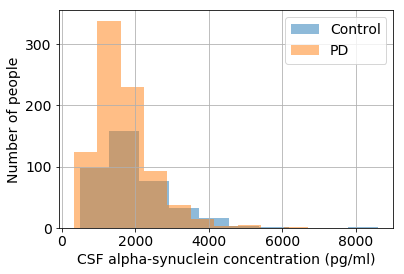

In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size':14})
control.hist(label='Control',alpha=0.5)
pd.hist(label='PD',alpha=0.5)
plt.xlabel('CSF alpha-synuclein concentration (pg/ml)')
plt.ylabel('Number of people')
plt.legend();
plt.show()

![abstract](images/alpha-synuclein-abstract.png)